In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Задание
1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor

3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
    
4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.

# Регрессия

In [25]:
data = pd.read_csv('../datasets/raw/cars.csv')
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [26]:
data['engine_capacity'].fillna(0, inplace=True)
data.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [27]:
data.drop(columns=['engine_fuel', 'model_name', 'color', 'location_region'], inplace=True)
data

,manufacturer_name,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,automatic,190000,2010,False,gasoline,2.5,universal,False,owned,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,automatic,290000,2002,False,gasoline,3.0,universal,False,owned,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,automatic,402000,2001,False,gasoline,2.5,suv,False,owned,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,mechanical,10000,1999,False,gasoline,3.0,sedan,False,owned,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,automatic,280000,2001,False,gasoline,2.5,universal,False,owned,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,automatic,290000,2000,False,gasoline,3.5,sedan,False,owned,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,mechanical,321000,2004,False,diesel,2.2,hatchback,False,owned,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,automatic,777957,2000,False,gasoline,3.5,sedan,False,owned,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,mechanical,20000,2001,False,gasoline,2.0,minivan,False,owned,...,True,False,False,False,False,False,False,False,True,490


In [28]:
df = pd.get_dummies(data, columns=['manufacturer_name', 'transmission', 'state', 'engine_type', 'body_type', 'drivetrain'])
df

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,drivetrain_all,drivetrain_front,drivetrain_rear
0,190000,2010,False,2.5,False,10900.00,False,9,13,False,...,0,0,0,0,0,1,0,1,0,0
1,290000,2002,False,3.0,False,5000.00,True,12,54,False,...,0,0,0,0,0,1,0,1,0,0
2,402000,2001,False,2.5,False,2800.00,True,4,72,False,...,0,0,0,0,1,0,0,1,0,0
3,10000,1999,False,3.0,False,9999.00,True,9,42,True,...,0,0,0,1,0,0,0,1,0,0
4,280000,2001,False,2.5,False,2134.11,True,14,7,False,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,False,...,0,0,0,1,0,0,0,0,1,0
38527,321000,2004,False,2.2,False,4800.00,True,4,20,False,...,0,0,0,0,0,0,0,0,1,0
38528,777957,2000,False,3.5,False,4300.00,False,3,63,False,...,0,0,0,1,0,0,0,0,1,0
38529,20000,2001,False,2.0,False,4000.00,True,7,156,False,...,0,1,0,0,0,0,0,0,1,0


In [29]:
y = df['price_usd']
X = df.drop(columns=['price_usd'])


test_share = 0.98

test_count = int(data.shape[0] * (1 - test_share))

X_train = X.iloc[test_count:,:]
X_test = X.iloc[:test_count:]

y_train = y.iloc[test_count:]
y_test = y.iloc[:test_count:]

In [40]:
reg = DecisionTreeRegressor(max_depth=9)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)



0.5700597980025348

In [41]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_1 <= 2008.50
|   |--- feature_1 <= 2001.50
|   |   |--- feature_3 <= 2.15
|   |   |   |--- feature_1 <= 1998.50
|   |   |   |   |--- feature_1 <= 1995.50
|   |   |   |   |   |--- feature_3 <= 1.85
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_95 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 1975.50
|   |   |   |   |   |   |   |   |   |--- value: [3360.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  1975.50
|   |   |   |   |   |   |   |   |   |--- value: [1579.81]
|   |   |   |   |   |   |   |--- feature_95 >  0.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |   |   |   |   |--- value: [1062.67]
|   |   |   |   |   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |   |   |   |   |--- value: [1326.77]
|   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.75
|   |   |   |   |   |   |   |   |--- feature_70 <= 0.50
|   |   |   |   |   |   |  

Error in callback <function _draw_all_if_interactive at 0x00000178CCA50940> (for post_execute):


KeyboardInterrupt: 

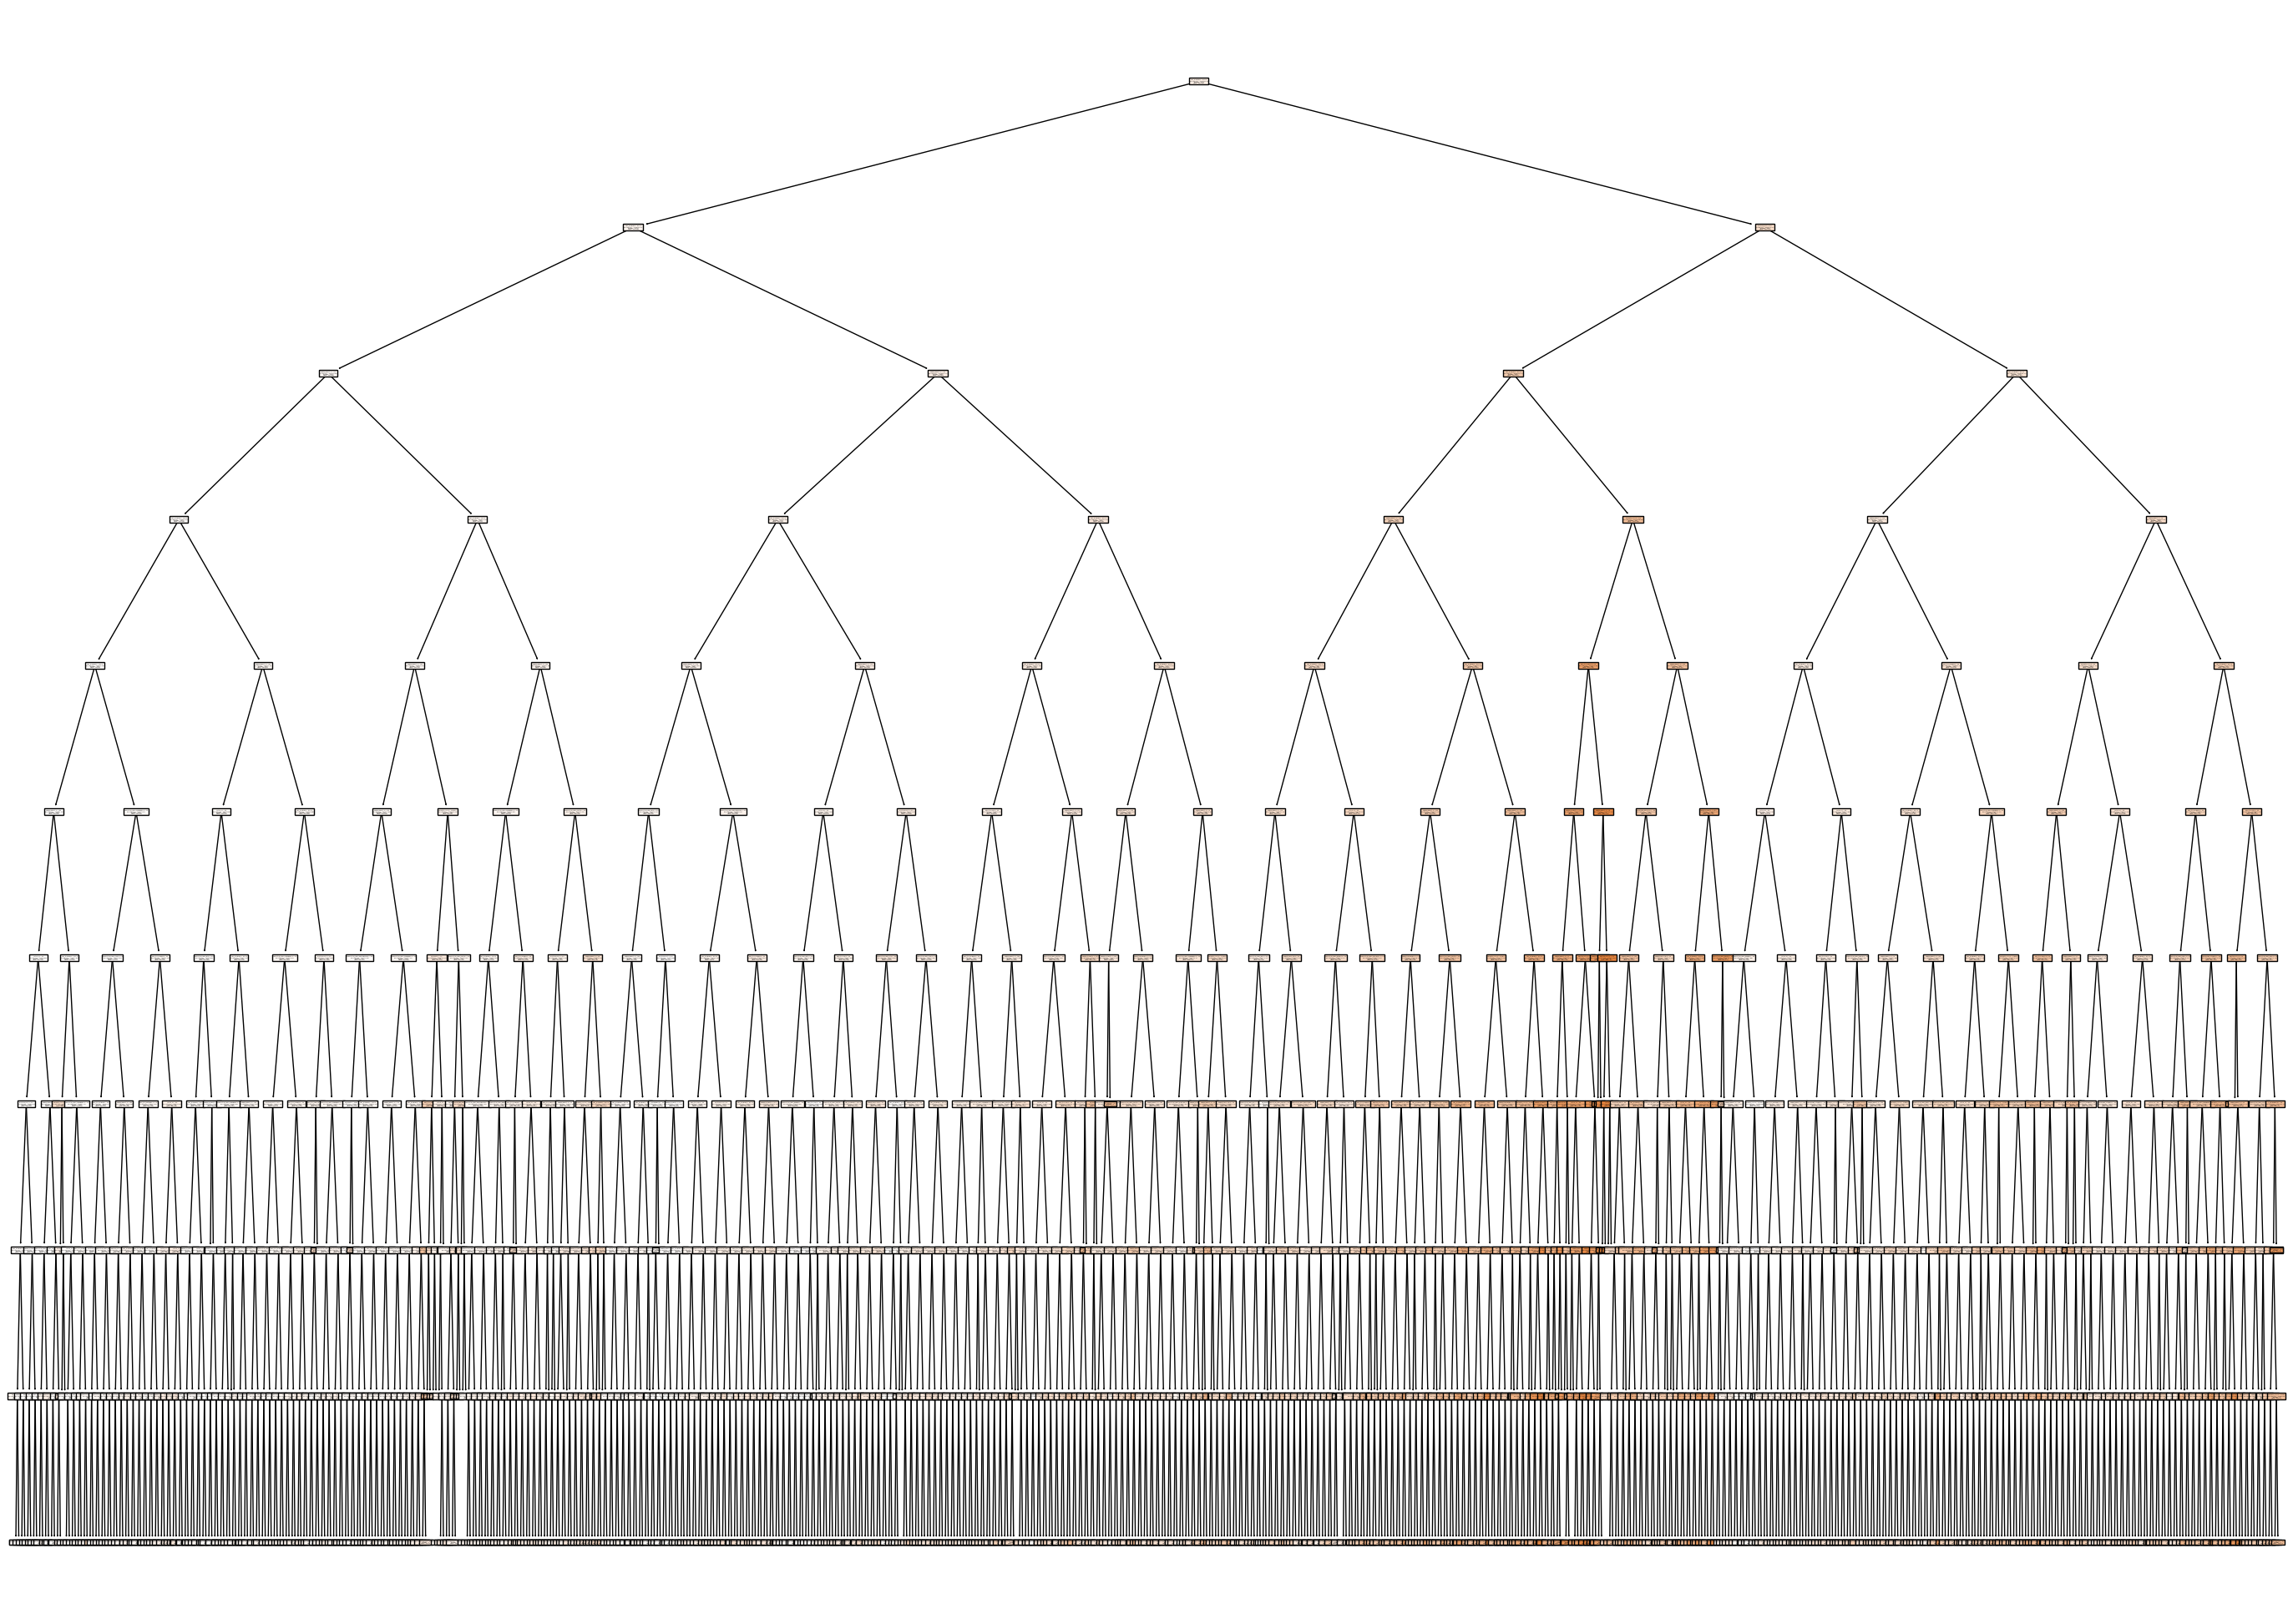

In [39]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(35,25))
_ = tree.plot_tree(reg, feature_names=X.columns, filled=True)

## Бэггинг (регрессия)

In [12]:
from sklearn.ensemble import BaggingRegressor


reg1 = DecisionTreeRegressor(max_depth=4)
scores = [BaggingRegressor(estimator = reg1, n_estimators = i, random_state=0).fit(X_train, y_train).score(X_test, y_test) for i in range(1, 100, 10)]

''

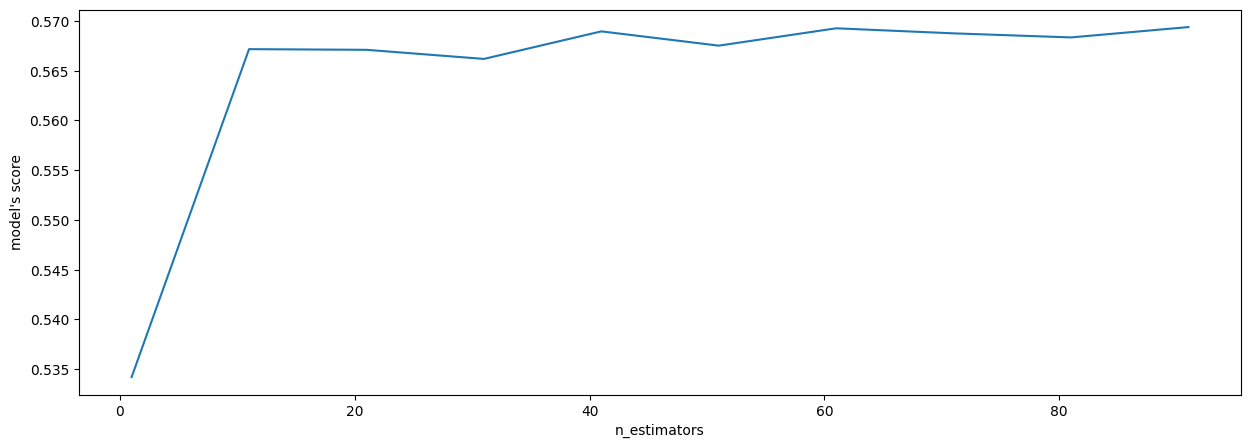

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(1, 100, 10)], scores)
plt.xlabel('n_estimators')
plt.ylabel("model's score")
;

In [33]:
reg1 = DecisionTreeRegressor(max_depth=4)
model = BaggingRegressor(estimator = reg1, n_estimators = 60, random_state=0)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5064229326459833

## Бустинг (регрессия)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor


scores = [GradientBoostingRegressor(n_estimators=i, random_state=0).fit(X_train, y_train).score(X_test, y_test) for i in range(1, 100, 10)]

KeyboardInterrupt: 

''

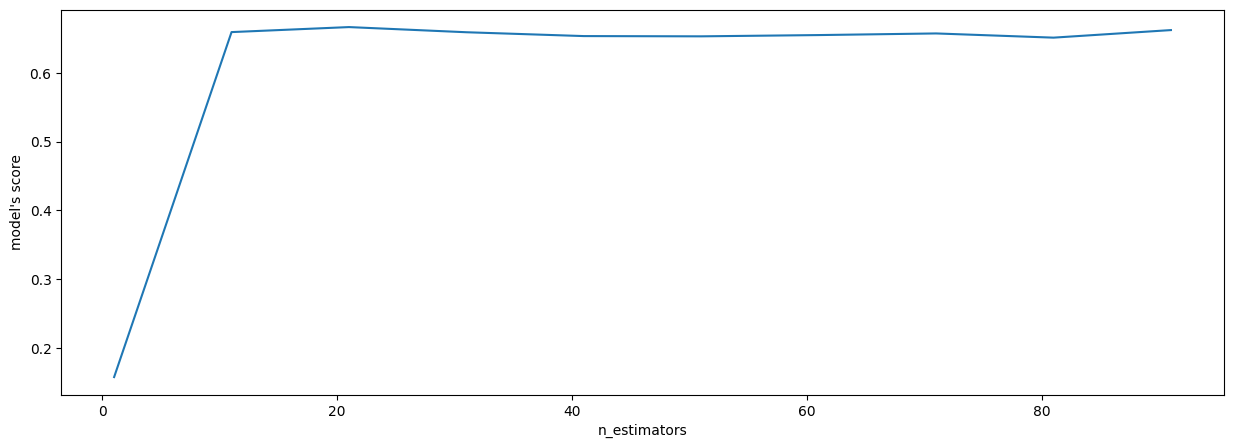

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(1, 100, 10)], scores)
plt.xlabel('n_estimators')
plt.ylabel("model's score")
;

In [35]:
reg2 = GradientBoostingRegressor(n_estimators=20, random_state=0)
reg2.fit(X_train, y_train)

reg2.score(X_test, y_test)

0.6791555226893933

## Стэкинг (регрессия)

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

estimators = [
    ('lr', LinearRegression()),
    ('gbr', GradientBoostingRegressor(n_estimators=40, random_state=0)),
    ('bgr', BaggingRegressor(estimator = DecisionTreeRegressor(max_depth=4), n_estimators = 15, random_state=0))
]

sr = StackingRegressor(estimators=estimators)

sr.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('gbr',
                               GradientBoostingRegressor(n_estimators=40,
                                                         random_state=0)),
                              ('bgr',
                               BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                                n_estimators=15,
                                                random_state=0))])

In [177]:
sr.score(X_test, y_test)

0.5609254880070386

# Классификация

In [71]:
from sklearn.tree import DecisionTreeClassifier 

In [72]:
data = pd.read_csv('../datasets/raw/diabetes.csv')
data = data.sample(frac=1)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
124454,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,10.0,30.0,1.0,0.0,7.0,3.0,4.0
250720,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,30.0,0.0,1.0,0.0,12.0,4.0,1.0
34396,2.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,30.0,14.0,0.0,0.0,7.0,3.0,4.0
120310,0.0,0.0,1.0,0.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,6.0
162410,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211194,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,8.0
252316,0.0,0.0,1.0,1.0,18.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,30.0,3.0,0.0,0.0,3.0,4.0,1.0
195179,0.0,0.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,4.0,0.0,1.0,11.0,3.0,1.0
185077,0.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,9.0,5.0,6.0


In [73]:
test_share = 0.98

test_count = int(data.shape[0] * (1 - test_share))

data_train = data.iloc[test_count:,:]
data_test = data.iloc[:test_count:]

In [83]:
from sklearn.utils import resample

data_0 = data_train[data_train['Diabetes_012'] == 0]
data_1 = data_train[data_train['Diabetes_012'] == 1]
data_2 = data_train[data_train['Diabetes_012'] == 2]

data_0 = resample(data_0, replace=False, n_samples=5000)
data_1 = resample(data_1, replace=True, n_samples=5000)
data_2 = resample(data_2, replace=True, n_samples=5000)

data_train = pd.concat([data_0, data_1, data_2])
data_train['Diabetes_012'].groupby(data_train['Diabetes_012']).count()

Diabetes_012
0.0    5000
1.0    5000
2.0    5000
Name: Diabetes_012, dtype: int64

In [84]:
y_train = data_train['Diabetes_012']
X_train = data_train.drop(columns=['Diabetes_012'])

y_test = data_test['Diabetes_012']
X_test = data_test.drop(columns=['Diabetes_012'])

y_test

124454    0.0
250720    0.0
34396     2.0
120310    0.0
162410    0.0
         ... 
195059    0.0
87501     0.0
244882    0.0
122756    0.0
3819      2.0
Name: Diabetes_012, Length: 5073, dtype: float64

In [85]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.5706682436428149

In [122]:
print(tree.export_text(clf))

|--- feature_13 <= 2.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- feature_3 <= 31.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  31.50
|   |   |   |   |--- class: 0.0
|   |   |--- feature_18 >  8.50
|   |   |   |--- feature_3 <= 29.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  29.50
|   |   |   |   |--- class: 1.0
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_18 <= 6.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_18 >  6.50
|   |   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_3 <= 28.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  28.50
|   |   |   |   |--- class: 1.0
|--- feature_13 >  2.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_18 <= 7.50
|   |   |   |--- feature_13 <= 3.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_13 >  3.50
|   |   |   |   |--- class: 1.0
|   |   |--- feature_18 >  7.50
|

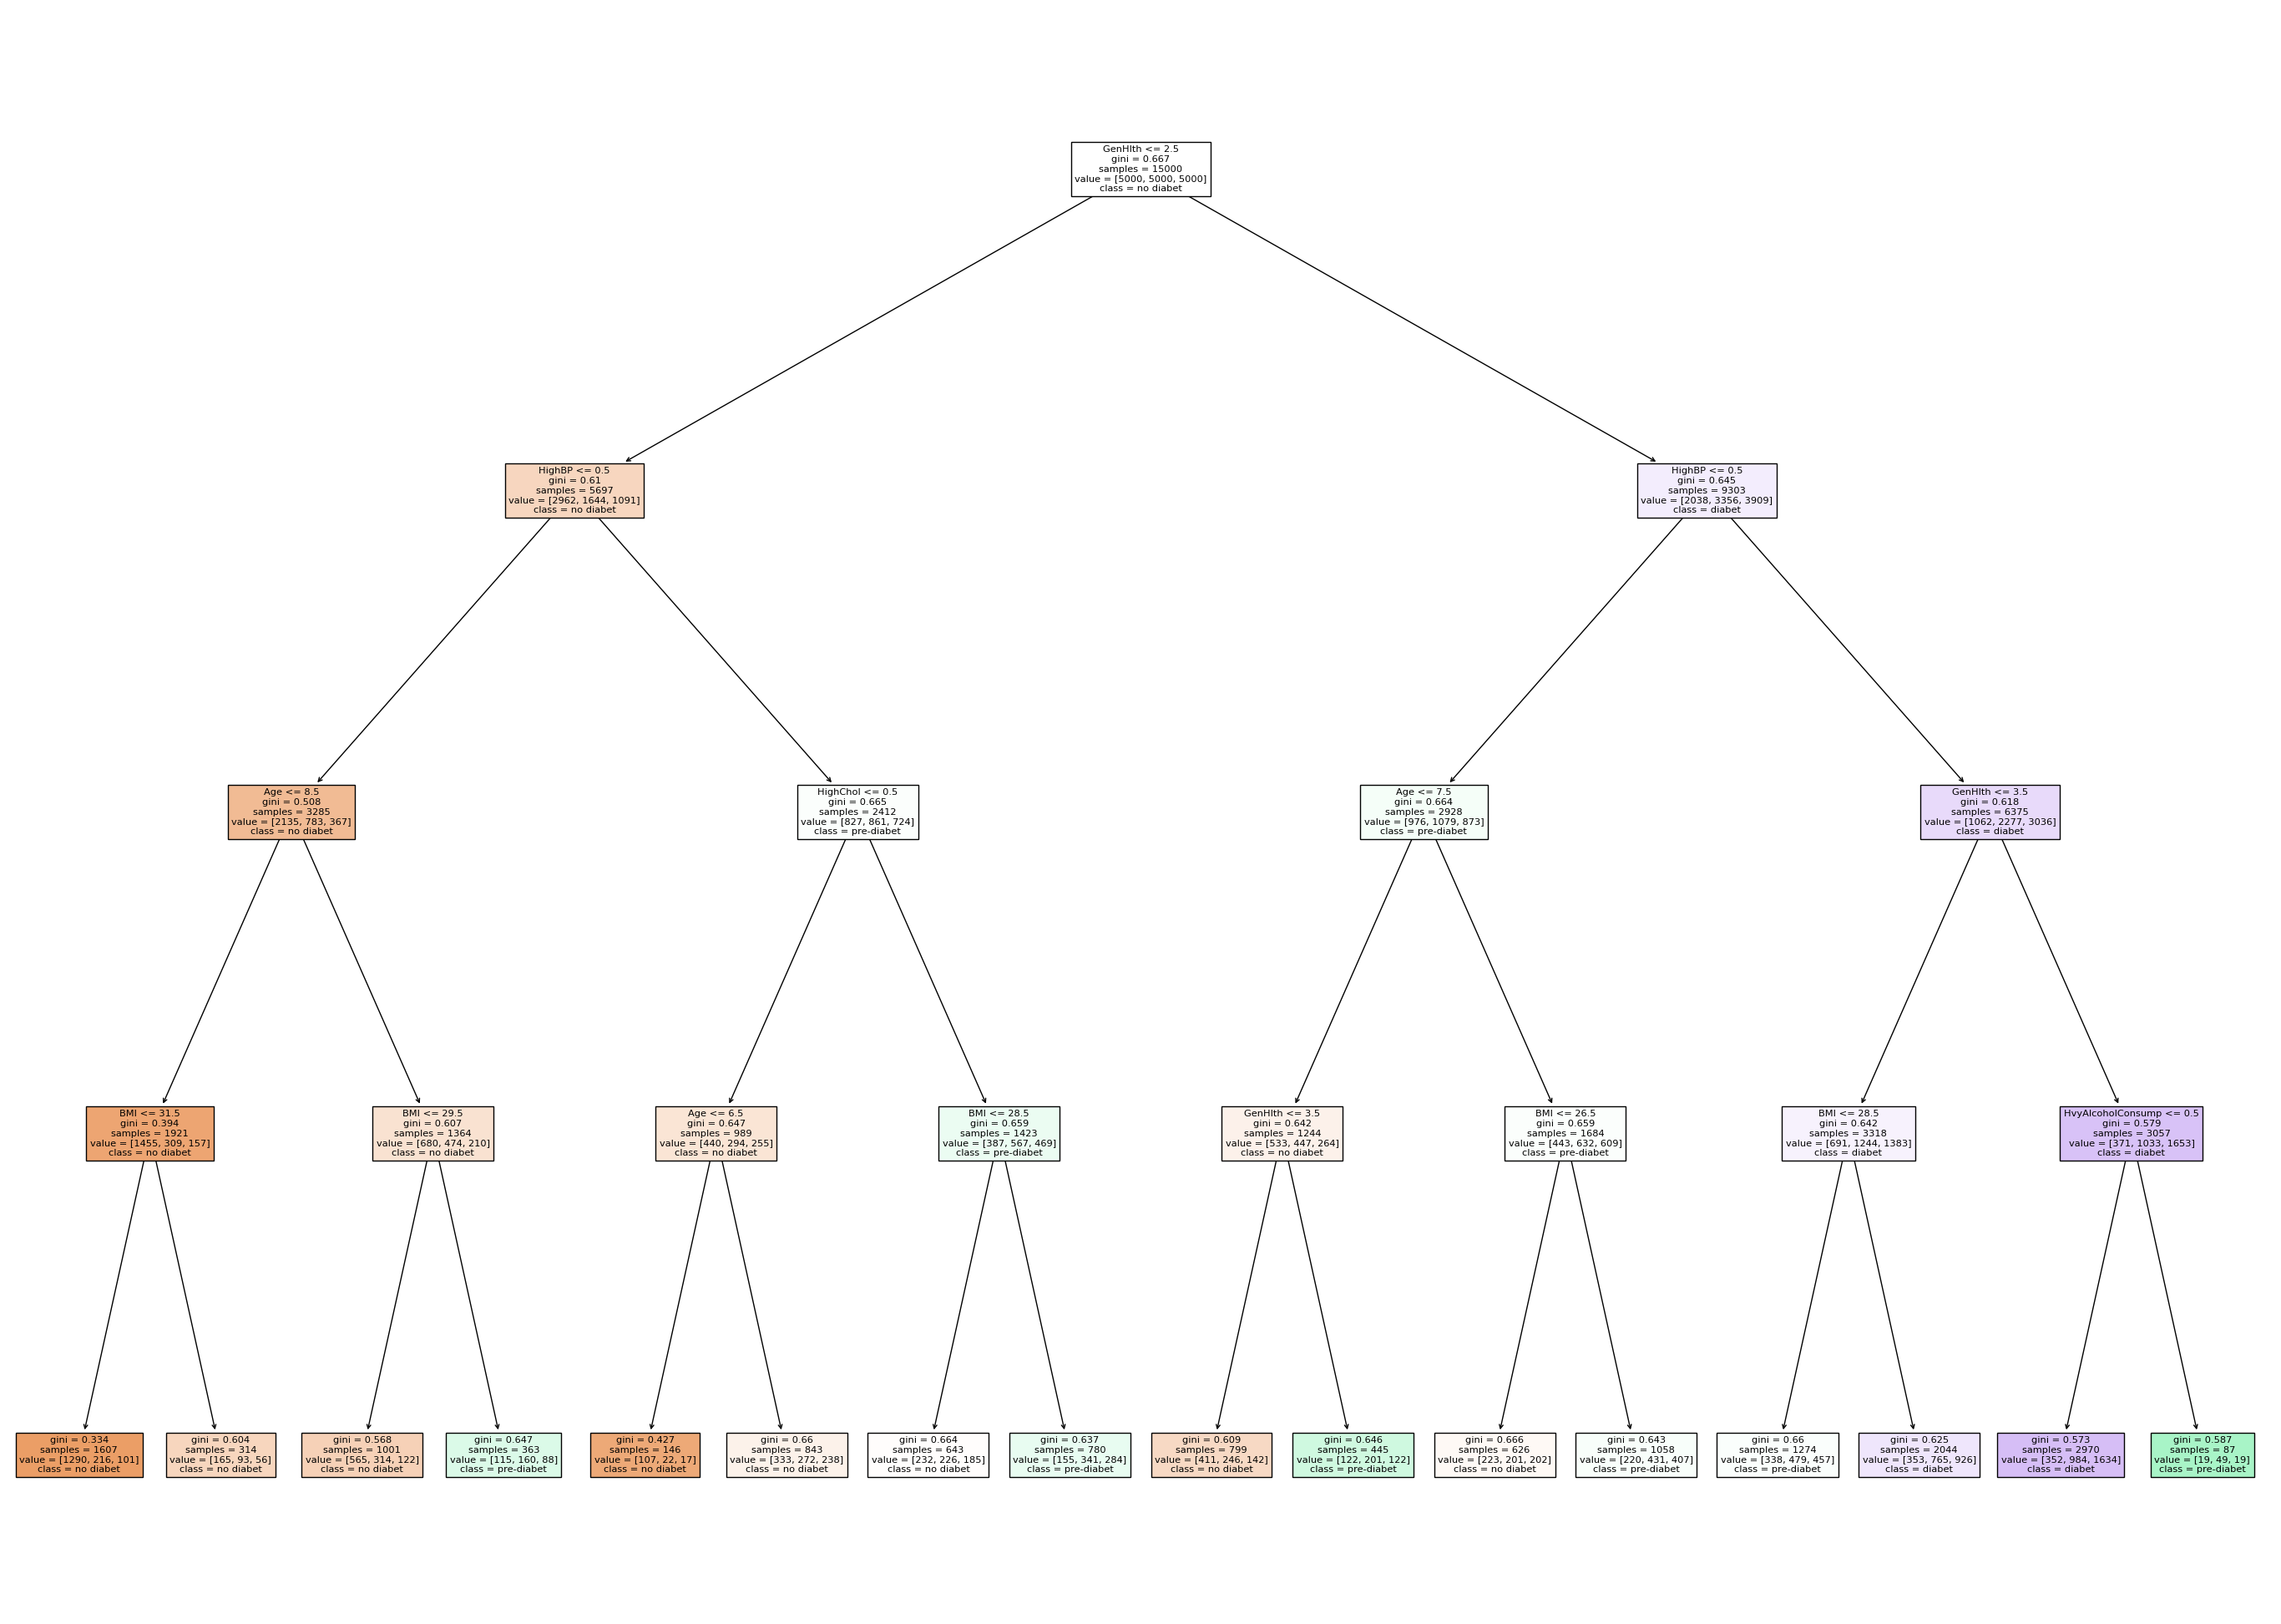

In [123]:
fig = plt.figure(figsize=(35,25))
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=['no diabet', 'pre-diabet', 'diabet'], filled=True)

## Бэггинг (классификация)

In [124]:
from sklearn.ensemble import BaggingClassifier


clf1 = DecisionTreeClassifier(max_depth=4)
scores = [BaggingClassifier(estimator = clf1, n_estimators = i, random_state=0).fit(X_train, y_train).score(X_test, y_test) for i in range(1, 25, 4)]

''

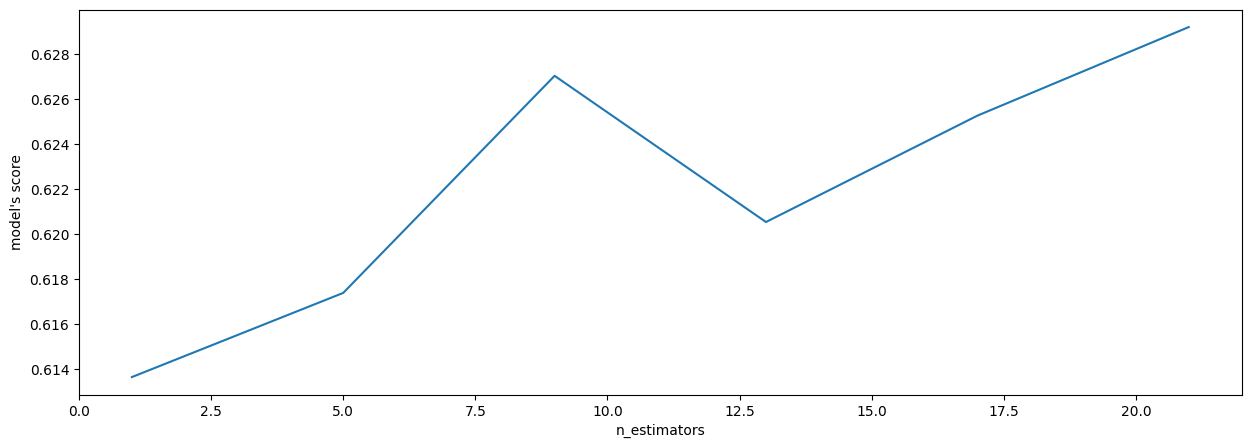

In [125]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(1, 25, 4)], scores)
plt.xlabel('n_estimators')
plt.ylabel("model's score")
;

In [132]:
model = BaggingClassifier(estimator = clf1, n_estimators = 8, random_state=0)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6282278730534201

## Бустинг (классификация)

In [133]:
from sklearn.ensemble import GradientBoostingClassifier


scores = [GradientBoostingClassifier(n_estimators=i, random_state=0).fit(X_train, y_train).score(X_test, y_test) for i in range(1, 25, 4)]

''

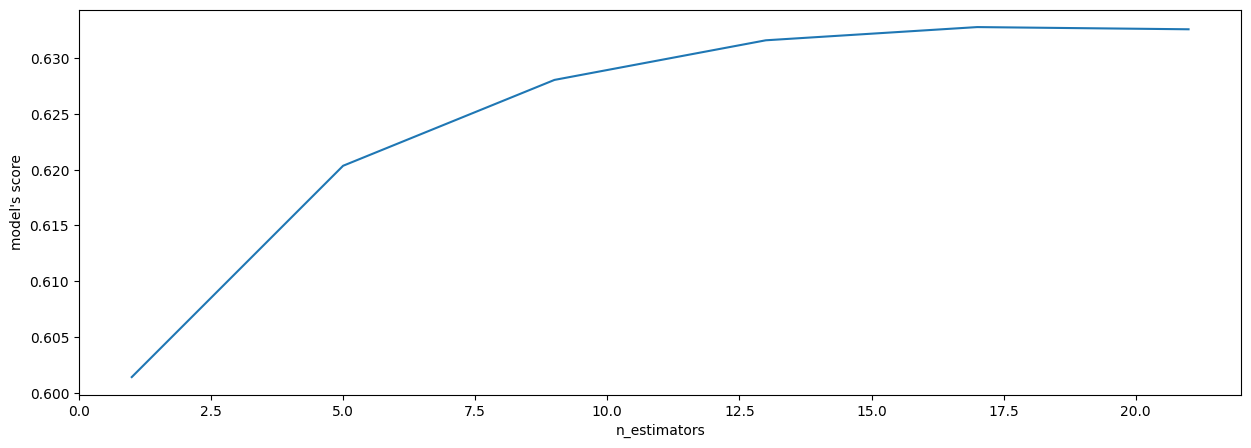

In [134]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(1, 25, 4)], scores)
plt.xlabel('n_estimators')
plt.ylabel("model's score")
;

In [135]:
clf2 = GradientBoostingClassifier(n_estimators=13, random_state=0)
clf2.fit(X_train, y_train)

clf2.score(X_test, y_test)

0.631578947368421

## Стэкинг (классификация)

In [140]:
from sklearn.ensemble import StackingClassifier


clf10 = DecisionTreeClassifier(max_depth=4)

estimators = [
     ('bgc', BaggingClassifier(estimator = clf10, n_estimators = 8, random_state=0)),
    ('gbc', GradientBoostingClassifier(n_estimators=13, random_state=0))
]

srcl = StackingClassifier(estimators=estimators)
srcl.fit(X_train, y_train)

StackingClassifier(estimators=[('bgc',
                                BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                                                  n_estimators=8,
                                                  random_state=0)),
                               ('gbc',
                                GradientBoostingClassifier(n_estimators=13,
                                                           random_state=0))])

In [141]:
srcl.score(X_train, y_train)

0.5267333333333334

## Catboost (Регрессия)

In [264]:
from catboost import CatBoostRegressor

In [265]:
data = pd.read_csv('../datasets/raw/cars.csv')
data['engine_capacity'].fillna(0, inplace=True)
data.drop(columns=['engine_fuel', 'model_name', 'color', 'engine_type', 'body_type', 'drivetrain', 'location_region'], inplace=True)
df = pd.get_dummies(data, columns=['manufacturer_name', 'transmission', 'state'])
y = df['price_usd']
X = df.drop(columns=['price_usd'])
X.shape

(38531, 79)

In [266]:
lrs = [CatBoostRegressor(iterations=2,
                          learning_rate=i/10,
                          depth=16,
                          task_type="GPU").fit(X_s, y_s).score(X_s, y_s) for i in range(1, 11)]

NameError: name 'X_s' is not defined

''

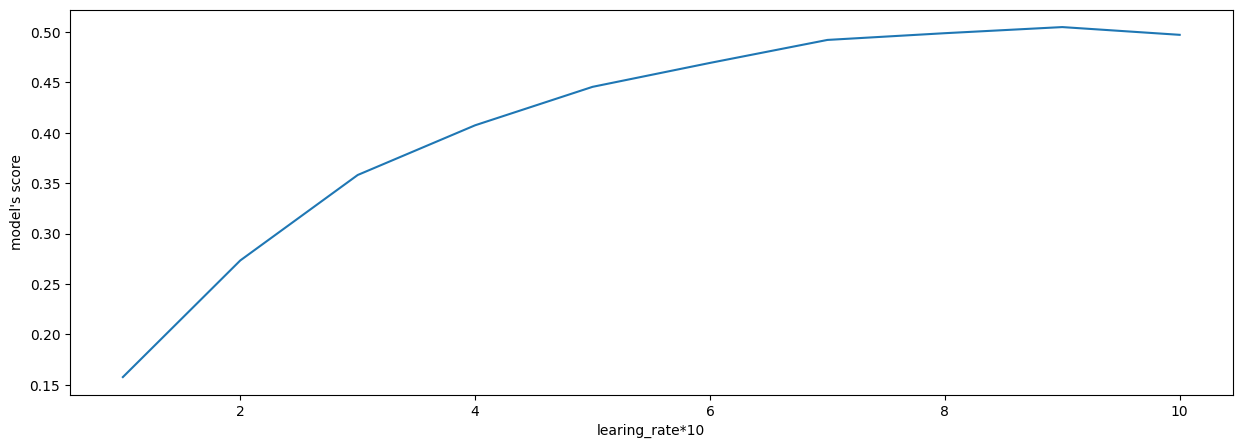

In [59]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(1, 11)], lrs)
plt.xlabel('learing_rate*10')
plt.ylabel("model's score")
;

In [60]:
model = CatBoostRegressor(iterations=2,
                          learning_rate=0.9,
                          depth=16,
                          task_type="GPU")

model.fit(X_s, y_s)
model.score(X_s, y_s)

0:	learn: 0.6017460	total: 350ms	remaining: 350ms
1:	learn: 0.5745646	total: 658ms	remaining: 0us


0.5048134423629697

In [61]:
depths = [CatBoostRegressor(iterations=2,
                          learning_rate=0.9,
                          depth=i,
                          task_type="GPU").fit(X_s, y_s).score(X_s, y_s) for i in range(2, 17)]

0:	learn: 0.7135182	total: 11.2ms	remaining: 11.2ms
1:	learn: 0.6935328	total: 20.8ms	remaining: 0us
0:	learn: 0.6986791	total: 13.7ms	remaining: 13.7ms
1:	learn: 0.6836457	total: 25.3ms	remaining: 0us
0:	learn: 0.6896871	total: 16.5ms	remaining: 16.5ms
1:	learn: 0.6719795	total: 33.8ms	remaining: 0us
0:	learn: 0.6822600	total: 16.7ms	remaining: 16.7ms
1:	learn: 0.6607186	total: 32.3ms	remaining: 0us
0:	learn: 0.6755870	total: 19.1ms	remaining: 19.1ms
1:	learn: 0.6541220	total: 36.4ms	remaining: 0us
0:	learn: 0.6680191	total: 21.5ms	remaining: 21.5ms
1:	learn: 0.6476609	total: 40.4ms	remaining: 0us
0:	learn: 0.6605821	total: 26.4ms	remaining: 26.4ms
1:	learn: 0.6383289	total: 48.3ms	remaining: 0us
0:	learn: 0.6554296	total: 27.4ms	remaining: 27.4ms
1:	learn: 0.6308771	total: 50.7ms	remaining: 0us
0:	learn: 0.6510099	total: 36.1ms	remaining: 36.1ms
1:	learn: 0.6268863	total: 67.3ms	remaining: 0us
0:	learn: 0.6362639	total: 43.6ms	remaining: 43.6ms
1:	learn: 0.6205993	total: 82.2ms	remai

''

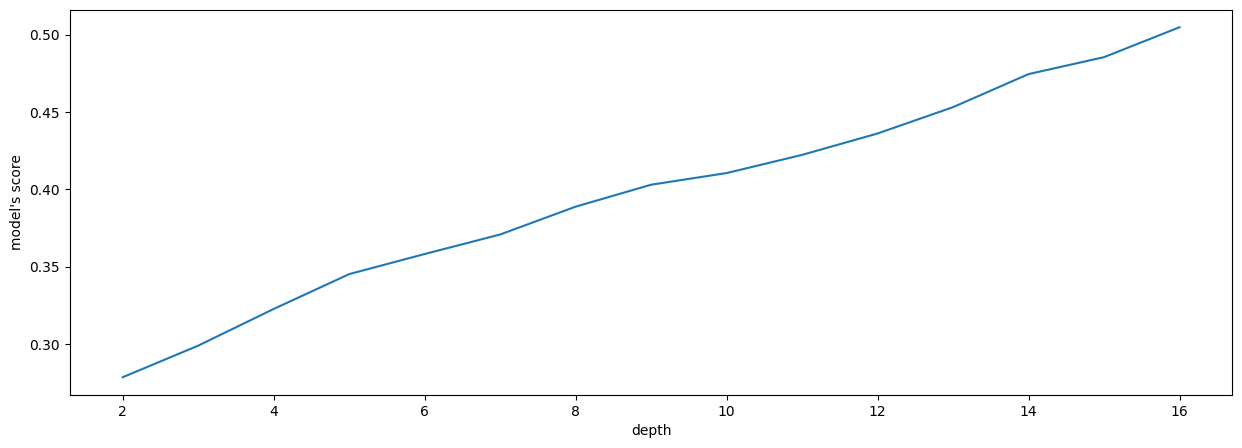

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(2, 17)], depths)
plt.xlabel('depth')
plt.ylabel("model's score")
;

## Catboost (Классификация)

In [143]:
from catboost import CatBoostClassifier

data = pd.read_csv('../datasets/raw/diabetes.csv')
data = data.sample(frac=1)


test_share = 0.98
test_count = int(data.shape[0] * (1 - test_share))
data_train = data.iloc[test_count:,:]
data_test = data.iloc[:test_count:]

data_0 = data_train[data_train['Diabetes_012'] == 0]
data_1 = data_train[data_train['Diabetes_012'] == 1]
data_2 = data_train[data_train['Diabetes_012'] == 2]

data_0 = resample(data_0, replace=False, n_samples=5000)
data_1 = resample(data_1, replace=True, n_samples=5000)
data_2 = resample(data_2, replace=True, n_samples=5000)

data_train = pd.concat([data_0, data_1, data_2])


y_train = data_train['Diabetes_012']
X_train = data_train.drop(columns=['Diabetes_012'])

y_test = data_test['Diabetes_012']
X_test = data_test.drop(columns=['Diabetes_012'])


In [144]:
lrs = [CatBoostClassifier(iterations=2,
                          learning_rate=i/10,
                          depth=12,
                          task_type="GPU").fit(X_train, y_train).score(X_test, y_test) for i in range(1, 11)]

0:	learn: 1.0718696	total: 113ms	remaining: 113ms
1:	learn: 1.0473415	total: 207ms	remaining: 0us
0:	learn: 1.0469135	total: 90.9ms	remaining: 90.9ms
1:	learn: 1.0025879	total: 184ms	remaining: 0us
0:	learn: 1.0237662	total: 91.1ms	remaining: 91.1ms
1:	learn: 0.9651988	total: 184ms	remaining: 0us
0:	learn: 1.0024357	total: 100ms	remaining: 100ms
1:	learn: 0.9296380	total: 199ms	remaining: 0us
0:	learn: 0.9829146	total: 91.6ms	remaining: 91.6ms
1:	learn: 0.9006660	total: 189ms	remaining: 0us
0:	learn: 0.9651814	total: 90.9ms	remaining: 90.9ms
1:	learn: 0.8753657	total: 184ms	remaining: 0us
0:	learn: 0.9492014	total: 93.5ms	remaining: 93.5ms
1:	learn: 0.8610112	total: 186ms	remaining: 0us
0:	learn: 0.9349275	total: 91.3ms	remaining: 91.3ms
1:	learn: 0.8518538	total: 179ms	remaining: 0us
0:	learn: 0.9223029	total: 104ms	remaining: 104ms
1:	learn: 0.8337365	total: 191ms	remaining: 0us
0:	learn: 0.9112652	total: 91ms	remaining: 91ms
1:	learn: 0.8206657	total: 176ms	remaining: 0us


''

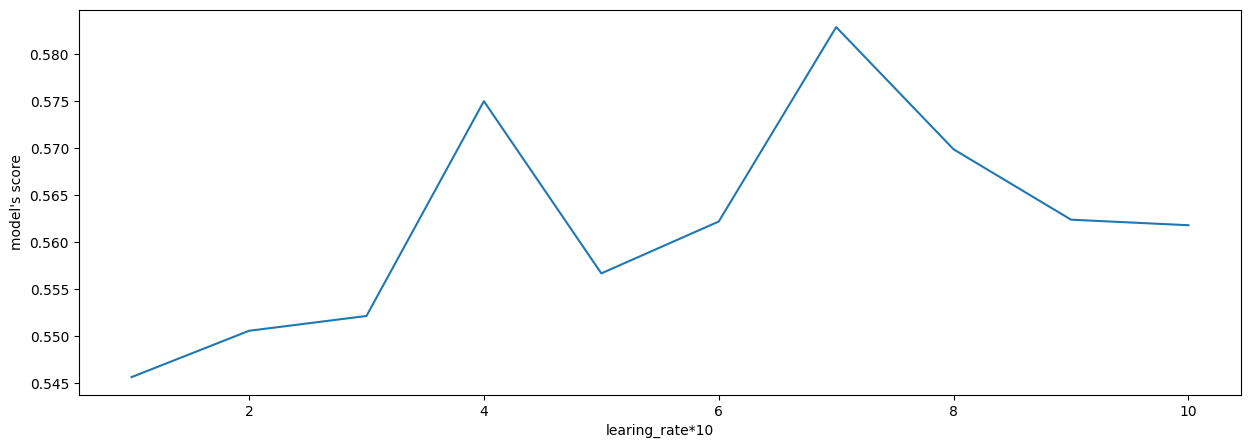

In [145]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(1, 11)], lrs)
plt.xlabel('learing_rate*10')
plt.ylabel("model's score")
;

In [147]:
model = CatBoostClassifier(iterations=2,
                           learning_rate=0.7,
                           depth=12,
                           task_type="GPU")

model.fit(X_train, y_train)
model.score(X_test, y_test)

0:	learn: 0.9492013	total: 111ms	remaining: 111ms
1:	learn: 0.8610112	total: 215ms	remaining: 0us


0.582889808791642

In [148]:
depths = [CatBoostClassifier(iterations=2,
                          learning_rate=0.7,
                          depth=i,
                          task_type="GPU").fit(X_train, y_train).score(X_test, y_test) for i in range(2, 15)]

0:	learn: 1.0193478	total: 5.01ms	remaining: 5.01ms
1:	learn: 0.9908031	total: 8.95ms	remaining: 0us
0:	learn: 1.0076413	total: 6.04ms	remaining: 6.04ms
1:	learn: 0.9750290	total: 10.2ms	remaining: 0us
0:	learn: 0.9943210	total: 7.04ms	remaining: 7.04ms
1:	learn: 0.9640154	total: 12.9ms	remaining: 0us
0:	learn: 0.9865263	total: 8.28ms	remaining: 8.28ms
1:	learn: 0.9599057	total: 16ms	remaining: 0us
0:	learn: 0.9812209	total: 10.5ms	remaining: 10.5ms
1:	learn: 0.9536535	total: 19.8ms	remaining: 0us
0:	learn: 0.9785947	total: 13.2ms	remaining: 13.2ms
1:	learn: 0.9471714	total: 24.7ms	remaining: 0us
0:	learn: 0.9750905	total: 16ms	remaining: 16ms
1:	learn: 0.9381891	total: 31.4ms	remaining: 0us
0:	learn: 0.9697904	total: 25.1ms	remaining: 25.1ms
1:	learn: 0.9237141	total: 46ms	remaining: 0us
0:	learn: 0.9644034	total: 41.1ms	remaining: 41.1ms
1:	learn: 0.9095086	total: 68.4ms	remaining: 0us
0:	learn: 0.9560008	total: 54.8ms	remaining: 54.8ms
1:	learn: 0.8836527	total: 107ms	remaining: 0us

''

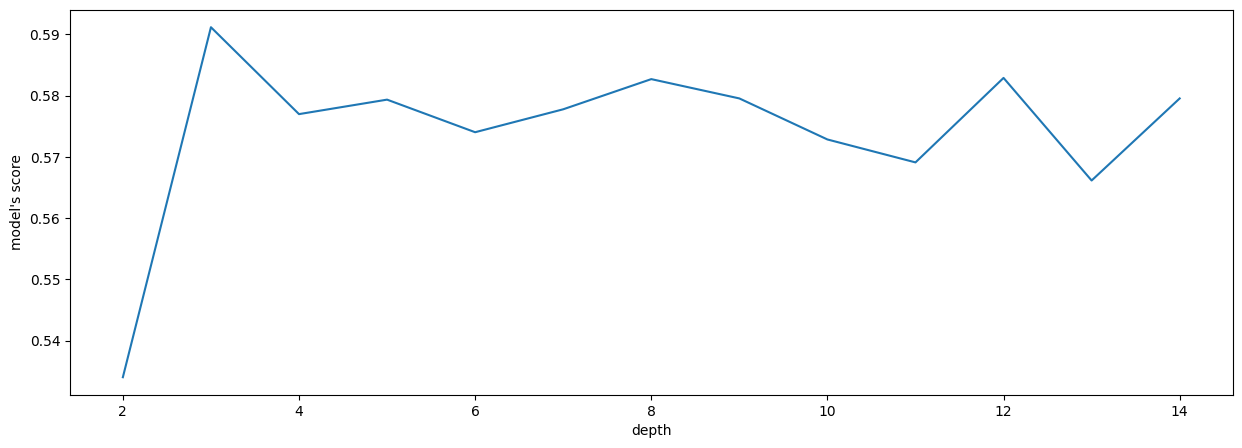

In [149]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot([i for i in range(2, 15)], depths)
plt.xlabel('depth')
plt.ylabel("model's score")
;

In [151]:
model = CatBoostClassifier(iterations=2,
                           learning_rate=0.7,
                           depth=3,
                           task_type="GPU")

model.fit(X_train, y_train)
model.score(X_test, y_test)

0:	learn: 1.0076413	total: 5.7ms	remaining: 5.7ms
1:	learn: 0.9750291	total: 10ms	remaining: 0us


0.5911689335698798

In [245]:
class Node():
    def __init__(self, feature=None, cond=None, left=None, right=None, info_gain=None, c_class=None):
        self.feature = feature
        self.cond = cond
        self.left = left
        self.right = right
        self.gain = info_gain
        
        self.c_class = c_class
        

In [267]:
class MyDecisionTreeClassifier():
    def __init__(self, min_samples_in_node=2, max_depth=3):
        self.root = None
        self.min_samples = min_samples_in_node
        self.max_depth = max_depth
        
    def build_tree(self, data, feature):
        self.root = self.fit(data, feature)
        
    def fit(self, data, feature, depth=0):
        
        X = data.drop(columns=[feature])
        y = data[feature]
        if np.shape(X)[0] >= self.min_samples and depth <= self.max_depth:
            best_split = self.best_split(data, feature, np.shape(X)[0], np.shape(X)[1])
            if best_split["gain"] > 0:
                left = self.fit(best_split["left"], best_split["feature_name"], depth+1)
                right = self.fit(best_split["right"], best_split["feature_name"], depth+1)
                return Node(best_split["index"], best_split["condition"], left, right, best_split["gain"])
            
        pred_class = self.calculate_leaf(y)
        return Node(c_class = pred_class)
    
    def split(self, data, index, value):
#         left = np.array([i for i in np.array(data) if i[index] <= value])
#         right = np.array([i for i in np.array(data) if i[index] > value])
        left = data[data[data.columns[index]] <= value]
        right = data[data[data.columns[index]] > value]
        return left, right
    
    def gini(self, y):
        
        classes = np.unique(y)
        gini = 0
        
        for cl in classes:
            pi = len(y[y==cl]) / len(y)
            gini += pi**2
            
        return 1 - gini
    
    def calculate_leaf(self, y):
        y = list(y)
        
        return max(y, key=y.count)
    
    def get_gain(self, parent, left, right):
        weight_l = len(left) / len(parent)
        weight_r = len(right) / len(parent)
        
        return self.gini(parent) - weight_l * self.gini(left) - weight_r * self.gini(right)
    
    def best_split(self, data, feature, n_samples, n_features):
        result = {}
        
        max_gain = -float("inf")
        X = data.drop(columns=[feature])
        y = data[feature]
        
        for feature_index in range(n_features):
            feature_values = X[X.columns[feature_index]]
            cond_values = set(list(feature_values))
            
            for feature_value in list(cond_values):
                left, right = self.split(data, feature_index, feature_value)
                
                if len(left) and len(right):
                    y, y_l, y_r = data[feature], left[feature], right[feature]
                    cur_gain = self.get_gain(y, y_l, y_r)
                    if cur_gain > max_gain:
                        result["index"] = feature_index
                        result["feature_name"] = feature
                        result["condition"] = feature_value
                        result["left"] = left
                        result["right"] = right
                        result["gain"] = cur_gain
                        max_gain = cur_gain
        
        return result
    
    def make_pred(self, x, cur_node):
        if cur_node.c_class != None:
            return cur_node.c_class
        
        val = x[cur_node.feature]
        
        if val <= cur_node.cond:
            return self.make_pred(x, cur_node.left)
            
        else:
            return self.make_pred(x, cur_node.right)
        
    def predict(self, X):
        return [self.make_pred(X.iloc[i], self.root) for i in range(len(X))]

In [268]:
data = pd.read_csv('../datasets/raw/diabetes.csv')
data = data.sample(frac=1)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
76822,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,6.0,8.0
252287,1.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,30.0,7.0,1.0,0.0,5.0,5.0,6.0
152134,0.0,1.0,0.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,0.0,30.0,0.0,1.0,10.0,3.0,5.0
10387,0.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,25.0,2.0,0.0,0.0,3.0,5.0,7.0
251639,0.0,0.0,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,30.0,0.0,0.0,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182324,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,20.0,0.0,0.0,8.0,5.0,7.0
53405,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,12.0,3.0,2.0
173674,0.0,1.0,0.0,1.0,18.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,7.0
68903,0.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,6.0,8.0


In [269]:
test_share = 0.98

test_count = int(data.shape[0] * (1 - test_share))

data_train = data.iloc[test_count:,:]
data_test = data.iloc[:test_count:]

In [270]:
from sklearn.utils import resample

data_0 = data_train[data_train['Diabetes_012'] == 0]
data_1 = data_train[data_train['Diabetes_012'] == 1]
data_2 = data_train[data_train['Diabetes_012'] == 2]

data_0 = resample(data_0, replace=False, n_samples=5000)
data_1 = resample(data_1, replace=True, n_samples=5000)
data_2 = resample(data_2, replace=True, n_samples=5000)

data_train = pd.concat([data_0, data_1, data_2])
data_train['Diabetes_012'].groupby(data_train['Diabetes_012']).count()

Diabetes_012
0.0    5000
1.0    5000
2.0    5000
Name: Diabetes_012, dtype: int64

In [271]:
my_clf = MyDecisionTreeClassifier(max_depth=3)
my_clf.build_tree(data_train, 'Diabetes_012')

# clf.score(X_test, y_test)

In [272]:
from sklearn.metrics import accuracy_score


y_test = data_test['Diabetes_012']
X_test = data_test.drop(columns=['Diabetes_012'])

y_pred = my_clf.predict(X_test)

accuracy_score(y_test, y_pred)

# len(X_test)

0.5357776463630988